# SWIRL Code

(c) IRSOL, 11.04.2022  
José Roberto Canivete Cuissa

--------
_default_swirl.param_
This Jupyter Notebook intends to be a tutorial on how to use the SWIRL code for identifiying automatically vortical structures in a grid-based two-dimensional velocity field using the 'Estimated Vortex Center' method presented in Canivete Cuissa & Steiner, A&A (submitted), 2022.  
In this tutorial, we show how to:
1. [Import the libraries and the data](#section1)
2. [Create an instance of the SWIRL Identification class](#section2)
3. [Run the code](#section3)
4. [Visualize the results](#section4)
5. [Save the results](#section5)
6. [Testing](#section6)

We will use the 'double Lamb-Oseen' vortex model presented in Sect.3 of the same paper as a test case. It consists of two dimensional velocity field composed by two Lamb-Oseen vortex models of opposite orientation and a Gaussian noisy velocity field.

For more details, please check the paper Canivete Cuissa & Steiner, A&A (submitted), 2022 or contact me at jose.canivete@irsol.usi.ch.

<a id='section1'></a>
## 1. Import the libraries and the data

First of all, we need to import the SWIRL code. If the *swirl* repository folder has been added to your PYTHONPATH, then you can simply import the code as:

In [4]:
import swirl

Otherwise, you can add update your PYTHONPATH on the fly with:
```
>>> import sys
>>> sys.path.append(r'\path\to\your\folder')
>>> import swirl
```

The two-dimensional velocity field is stored in the *data/lamb_oseen/* folder as two NumPy arrays: *vx.npy* and *vy.npy*. To load them, we make use of the NumPy library:

In [5]:
import numpy as np
vx = np.load('../data/lamb_oseen/vx.npy')
vy = np.load('../data/lamb_oseen/vy.npy')

<a id='section2'></a>
## 2. Create an instance of the SWIRL code class: Identification

The SWIRL algorithm is coded in a Python class called `Identification`, therefore you need to create an instance of such class to run the identication algorithm.  
A `Identification` object requires at least two arguments:
- `v = [vx, vy]` (list) : the velocity field 
- `grid_dx = [dx, dy]` (list) : the grid cells sizes

where `vx` and `vy` are two-dimensional NumPy arrays and correspond to the two components of the velocity field, while `dx` and `dy` are floats and correspond to the size of the grid cells in the two dimensions.  
*Attention!* It is important that the velocity field `v` and the grid cell sizes share the same physical spatial unit for a correct functioning of the identification algorithm. For example, if the velocity field is given in units of $cm/s$, the grid cell sizes must have units of $cm$.

In our 'double Lamb-Oseen' vortex model, the velocity field is arbitrarly given in units of $m/s$ and the grid cell size is $1\,m$ in both directions, so we can initialize the `dx` and `dy` variables as:

In [6]:
dx = 1.0
dy = 1.0


However, two more optional arguments are accepted, that are:
- `param_file=None` (string) : the path to the parameter file 
- `verbose=True` (bool) : the 'verbose' option

where `param_file` is a string indicating the path to the parameter file (default is `None`), while `verbose` is a bool that indicates if the user wants a printed report of the SWIRL `Identification` instance created and of the identification process (default is `True`). 
The default parameter file, *defaut_swirl.param* is stored in the root of the *swirl* directory. In it, the parameters of the `Identification` class are specified. We can have a look at it with the following command:

In [7]:
!cat ../default_swirl.param

# SWIRL parameters file with default values

[Criterion]
stencils : [1]
swirlstr_params : [0., 0., 0.]

[Clustering]
dc_param : 3.
dc_adaptive : True
cluster_fast : True
cluster_kernel : Gaussian
cluster_decision : gamma
cluster_params : [1.0, 0.5, 15.0]

[Noise]
noise_param : 1.5
kink_param : 1.0

The parameter file must keep the structure:
```
[Criterion]
...
[Clustering]
...
[Noise]
...
```

but the various parameters can be omitted. In that case, the default values (i.e. the one printed above) will be used. 
If no parameter file is passed as an argument in the initialization, the SWIRL code will use all the default parameters. The parameters initialized in the `Identification` instance can be accessed via the `params` dictionary attribute. For example, to access the value of the parameter `cluster_kernel`, one uses
```
>>> vortices.params['cluster_kernel'] 
```

For our test case, we will use the parameter file specific to the 'double Lamb-Oseen vortex model' that is found in the *data/lamb_oseen/* folder.

Therefore, for a basic initialization of a `Identification` instance, one can use:
```
>>> vortices = swirl.SWIRL(v=[vx, vy], grid_dx = [dx, dy])
```

but we recommend to specify the parameter file and the 'verbose' option explicitely, as follows

In [8]:
vortices = swirl.Identification(v=[vx, vy],
                                grid_dx=[dx,dy],
                                param_file='../data/lamb_oseen/lamb_oseen.param',
                                verbose=True)

---------------------------------------------------------
---                                                   ---
---    _/_/_/  _/          _/  _/   _/_/_/    _/      ---
---  _/         _/        _/   _/   _/    _/  _/      ---
---    _/_/      _/      _/    _/   _/_/_/    _/      ---
---        _/     _/ _/ _/     _/   _/  _/    _/      ---
---  _/_/_/        _/  _/      _/   _/   _/   _/_/_/  ---
---                                                   ---
---------------------------------------------------------
---------------------------------------------------------
---                                                   ---
---               (c) IRSOL, 11.04.2022               ---
---                                                   ---
--- Author:      José Roberto Canivete Cuissa         ---
--- Email:       jcanivete@ics.uzh.ch                 ---
---------------------------------------------------------
---
--- Parameters:
---------------
---    grid_dx          : 1.0, 1.0
-

<a id='section3'></a>
## 3. Run the code

The detection process can be splitted in four distinct steps:
1. Computing the Rortex mathematical criterion: `rortex`
2. Computing the G-EVC map: `gevc_map`
3. Clustering the G-EVC points to find cluster centers: `clustering()`
4. Detecting vortices from the cluster centers: `detect_vortices()`


Each one of these functions is a method of the `Identification` class and can be used separately. 
However, to run the full identification process, one can also simply use the `run()` method which will call in sequence the four functions as well as time them. If the parameter `verbose==True`, a report on the number of vortices identified and on the running time of the algorithm will be printed.

In [9]:
vortices.run()

---------------------------------------------------------
--- Starting identification 
---------------------------------------------------------
---
--- Computing EVC map
--- Clustering
--- Detecting vortices
---
---------------------------------------------------------
--- Identification completed 
---------------------------------------------------------
---
--- Identified vortices: 2
---
--- Timings
---    Rortex     :    204.348 ms
---    EVC map    :    29.239 ms
---    Clustering :    314.180 ms
---    Detection  :    21.401 ms
---    Total      :    570.936 ms
---------------------------------------------------------




As we can see in the report, two vortices have been indentified by the SWIRL code. To print a full report on the SWIRL instance after the initialization, use:

In [10]:
print(vortices)

---------------------------------------------------------
---                                                   ---
---    _/_/_/  _/          _/  _/   _/_/_/    _/      ---
---  _/         _/        _/   _/   _/    _/  _/      ---
---    _/_/      _/      _/    _/   _/_/_/    _/      ---
---        _/     _/ _/ _/     _/   _/  _/    _/      ---
---  _/_/_/        _/  _/      _/   _/   _/   _/_/_/  ---
---                                                   ---
---------------------------------------------------------
---------------------------------------------------------
---                                                   ---
---               (c) IRSOL, 11.04.2022               ---
---                                                   ---
--- Author:      José Roberto Canivete Cuissa         ---
--- Email:       jcanivete@ics.uzh.ch                 ---
---------------------------------------------------------
---
--- Parameters:
---------------
---    grid_dx          : 1.0, 1.0
-

Once the identification process has been completed, the `Identification` object can be viewd as a list of `Vortex` objects. Indeed, for each identified vortex, the `Identification` class stores the properties of that structure in a `Vortex` object. Each one of these objects can be accessed through the `Identification` instance as items of a list.

In [11]:
print('Number of identified vortices:', len(vortices))
vortex_0 = vortices[0]
vortex_1 = vortices[1]
print('Vortex N.1:', vortex_0)
print('Vortex N.2:', vortex_1)

Number of identified vortices: 2
Vortex N.1: Clockwise vortex,
---        Center : 124.50, 124.50,
---        Radius : 15.13;
Vortex N.2: Counter-clockwise vortex,
---        Center : 75.16, 75.16,
---        Radius : 37.25;


Each `Vortex` object has the following attributes:
- `radius` (float) : its effective radius in grid units
- `center` (list) : the coordinates of the center
- `orientation` (float) : its orientation, +1 = counterclockwise, -1 = clockwise
- `vortex_cells` (array) : the list of grid cells (coordinates) forming the vortex
- `all_cells` (array) :   the list of all the grid cells forming  the vortex, it can contain duplicates if multiple stencils are used
- `rortex` (array) : the rortex values for all_cells
- `stencils` (list) : stencil of grid cells used to compute criteria for all_cells

As we have seen, the statement
```
>>> print(vortex_0)
```
prints a brief report on the main characteristics of the identified vortex, while
```
>>> len(vortex_0)
```
returns the number of cells forming the vortex (i.e. `vortex_cells.shape[1]`)

It is often useful to have access at all radii, centers, and orientations of the identified vortices without sweeping over all the `Vortex` objects. Therefore, the `Identification` class has the `radii`, `centers`, `orientations` attributes which contain precisily the list of these properties.

In [12]:
print('List of vortices radii:\n', vortices.radii)
print('List of vortices centers:\n', vortices.centers)
print('List of vortices orientations\n', vortices.orientations)

List of vortices radii:
 [15.12827843 37.25360525]
List of vortices centers:
 [[124.50278164 144.59179416]
 [ 75.15733945  53.37821101]]
List of vortices orientations
 [-1.  1.]


One can also access the whole maps of vorticity `vorticity` (array), swirling strength `swirling_str` (array), and rortex `rortex` (array) criteria that where computed in the identification process with
```
vortices.rortex[stencil]
vortices.swirling_str[stencil]
vortices.vorticity[stencil]
```
where `stencil` (int) is the index of the grid cell stencil used. By default, `vortices.params['stencils'] = [1]`, hence in that case the criteria must be accessed with `stencil=0`.

Similarly, one can access the computed G-EVC map, `gevc_map` (array) and the criteria used to select the cluster centers `rho` (array), `delta` (array), and `gamma` (array):
```
vortices.gevc_map
vortices.rho
vortices.delta
vortices.gamma
```

<a id='section4'></a>
## 4. Visualize the results

A few simple plotting routines are provided in the *swirl* module to visualize the results of the identification process. The routines present at the moment are:
- plot_rortex(vortices, f_quiver=6, save=False)
- plot_gevc_map(vortices, f_quiver=6, save=False)
- plot_decision(vortices, save=False)
- plot_vortices(vortices, f_quiver=6, save=False)

The only required input is a `Identification` class instance with the results of the identification process. Additionally, one can set the frequency of the arrows in the vector plot of the velocity field with `f_quiver` and decide to save the figure in a .png file with `save=True`. Below, the resulting plots are shown

### Plot the Rortex map

This plot shows the value of the Rortex criterion $R$ given the two-dimensional velocity field. Colored patches (i.e. $R\neq0$) indicate curvature in the flow. Vortices are cleary related to $R\neq0$ regions, but as we can see a noisy velocity field can also generate non zero values of the Rortex criterion.indicate 

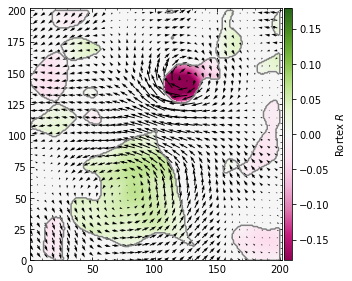

In [13]:
swirl.plot_rortex(vortices, f_quiver=6, save=False)

### Plot the G-EVC map

The G-EVC map correspond to the sum of the estimated vortex center (EVC) points in each cell, which is represented by the grid cardinality $s$. Positive values of $s$ are given by counter-clockwise EVCs, while negative ones by clockwise EVCs. In principle, vortex centers should be found in correspondence with peaks of the absolute value $s$, while random noise in the velocity field should contribute only to the background on this quantity. In this example, we can see the presence of two peaks in $|s|$, which represent the centers of the two vortices. 

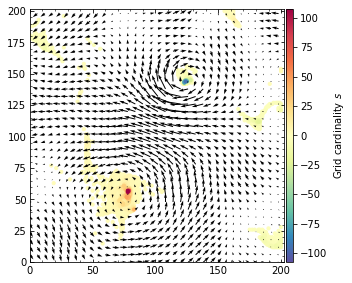

In [14]:
swirl.plot_gevc_map(vortices, f_quiver=6, save=False)

### Decision plots

This plots are used to calibrate the clustering parameters `cluster_params` in the parameter file. The G-EVCs points that are selected as cluster centers are those which are above the dashed line (if `cluster_decision=gamma`) or in the top right quadrant formed by the dotted lines (if `cluster_decision=delta-rho`), as this means that these points have large densities but are also relatively distant from other high density points. As a rule of thumb, the parameters in `cluster_params` should be adjusted such that the dashed line in the lower plot is right above the second kin in the curve.

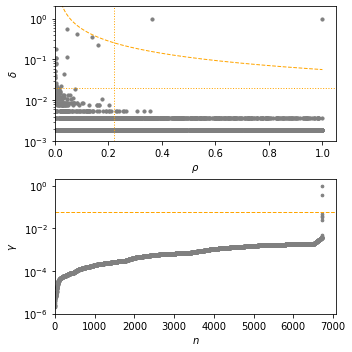

In [15]:
swirl.plot_decision(vortices, save=False)

### Plot identified vortices

Finally, one can plot the identified vortices with the *SWIRL* code. Here, the vortices are represented as disks of radius `vortex.radius` centered at `vortex.center`. We note that the true shape of the vortex structure may differ, and to visualize it correctly one should use `vortex.vortex_cells`. Nevertheless, for a first inspection of the results, this routine may be useful. In gray are shown the grid cells which took part in the identification process (because there $R\neq0$) but were classified as noisy signals.

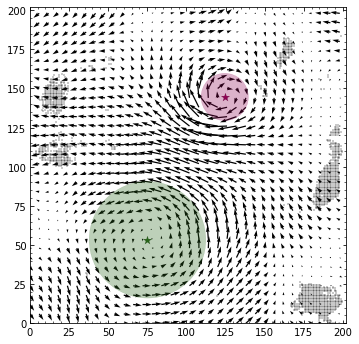

In [16]:
swirl.plot_vortices(vortices, save=False)

<a id='section5'></a>
## 5. Save the results 

The `Identification` class offers the possibility to save the results of the identification process in a *h5py* file. To do that, it is enough to call the following method of the class:

In [17]:
vortices.save(file_name='vortices')

A file named *vortices.h5* is now present in the current folder. To read it, one needs the *h5py* python module, which can be loaded with

In [18]:
import h5py

Then the file can be read and inspected with

In [19]:
hf = h5py.File('vortices.h5', 'r')
print('h5py SWIRL file contents')
[print('- ',k) for k in hf.keys()]
print('h5py SWIRL file attributes')
[print('- ',k) for k in hf.attrs.keys()]
hf.close()

h5py SWIRL file contents
-  data
-  params
-  vortices
h5py SWIRL file attributes
-  n_vortices
-  param_file


In the `data` group, one find the following datasets:
- radii
- centers
- orientations
- gevc_map
- rho
- delta
- gamma
- rortex

which contain the attributes of the `Identification` object. 

The `params` group contains all the parameters that are stored in the `params` attribute of the `Identification` class.

The individual vortices identified in the process are instead stored in the `vortices` group, which contains a subgroup for each vortex and this subgroups contain datasets such as:
- radius
- center
- orientation
- all_cells
- vortex_cells
- evc
- rortex
- cluster_center

Finally, the attributes `n_vortices` and `param_file` contain the number of identified vortices and the path of the parameter file, respectively.

Remember to close the file at the end of its usage with:
```
>>> hf.close()
```

<a id='section6'></a>
## 6. Testing

If you wish to modify the code, add functionalities, or fix a bug, feel free to do so. We implemented a test suite that should help to verify the integrity of your new version of the code. To launch the test suite, you will need the *unittest* package installed. To verify if you have it, please run the following line

In [20]:
import unittest

If no errors appeared, then you can move to the 'tests' folder in the root of the 'swirl' repository
```
>>> cd ../tests
```
and launch the following command
```
>>> python3 -m unittest -v swirl_test.py
```

If the tests are passed you'll see `ok` after the name of the test. If all the tests were successful, the last line of the output should read `OK`.

If your new implementation passed the tests and you want to share it with the community, you are very welcome to send in a pull request.